In [1]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import neattext.functions as nfx

In [4]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [5]:
df = pd.read_csv("udemy_courses.csv")

In [6]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [7]:
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3678,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2 hours,2016-06-14T17:36:46Z,Web Development
3679,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5 hours,2017-03-10T22:24:30Z,Web Development
3680,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5 hours,2015-12-30T16:41:42Z,Web Development
3681,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3 hours,2016-08-11T19:06:15Z,Web Development


In [8]:
df['course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3678    Learn jQuery from Scratch - Master of JavaScri...
3679    How To Design A WordPress Website With No Codi...
3680                        Learn and Build using Polymer
3681    CSS Animations: Create Amazing Effects on Your...
3682    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3683, dtype: object

In [9]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [10]:
# Clean Text:stopwords,special charac
df['clean_course_title'] = df['course_title'].apply(nfx.remove_stopwords)

In [11]:
# Clean Text:stopwords,special charac
df['clean_course_title'] = df['clean_course_title'].apply(nfx.remove_special_characters)

In [12]:
df[['course_title','clean_course_title']]

,course_title,clean_course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow You...,Complete GST Course Certification Grow Practice
2,Financial Modeling for Business Analysts and C...,Financial Modeling Business Analysts Consultants
3,Beginner to Pro - Financial Analysis in Excel ...,Beginner Pro Financial Analysis Excel 2017
4,How To Maximize Your Profits Trading Options,Maximize Profits Trading Options
...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,Learn jQuery Scratch Master JavaScript library
3679,How To Design A WordPress Website With No Codi...,Design WordPress Website Coding
3680,Learn and Build using Polymer,Learn Build Polymer
3681,CSS Animations: Create Amazing Effects on Your...,CSS Animations Create Amazing Effects Website


In [13]:
# Vectorize our Text
count_vect = CountVectorizer()
cv_mat = count_vect.fit_transform(df['clean_course_title'])

In [14]:
# Sparse
cv_mat

<3683x3564 sparse matrix of type '<class 'numpy.int64'>'
	with 18364 stored elements in Compressed Sparse Row format>

In [15]:
# Dense
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
df_cv_words = pd.DataFrame(cv_mat.todense(),columns=count_vect.get_feature_names())

C:\Users\CompuMisr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
df_cv_words.head()

,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Cosine Similarity Matrix
cosine_sim_mat = cosine_similarity(cv_mat)

In [19]:
cosine_sim_mat

array([[1.        , 0.20412415, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20412415, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.23570226],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23570226, 0.        ,
        1.        ]])

In [20]:
# import seaborn as sns
# sns.heatmap(cosine_sim_mat[0:10],annot=True)

In [21]:
# Get Course ID/Index
course_indices = pd.Series(df.index,index=df['course_title']).drop_duplicates()

In [22]:
course_indices

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3678
How To Design A WordPress Website With No Coding At All        3679
Learn and Build using Polymer                                  3680
CSS Animations: Create Amazing Effects on Your Website         3681
Using MODX CMS to Build Websites: A Beginner's Guide           3682
Length: 3683, dtype: int64

In [23]:
course_indices['How To Maximize Your Profits Trading Options']

4

In [24]:
idx = course_indices['How To Maximize Your Profits Trading Options']

In [25]:
idx

4

In [26]:
scores = list(enumerate(cosine_sim_mat[idx]))

In [27]:
scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 1.0),
 (5, 0.20412414523193154),
 (6, 0.20412414523193154),
 (7, 0.1889822365046136),
 (8, 0.3779644730092272),
 (9, 0.0),
 (10, 0.20412414523193154),
 (11, 0.5),
 (12, 0.0),
 (13, 0.17677669529663687),
 (14, 0.35355339059327373),
 (15, 0.0),
 (16, 0.0),
 (17, 0.1889822365046136),
 (18, 0.22360679774997896),
 (19, 0.0),
 (20, 0.30151134457776363),
 (21, 0.20412414523193154),
 (22, 0.1889822365046136),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.1889822365046136),
 (30, 0.35355339059327373),
 (31, 0.0),
 (32, 0.0),
 (33, 0.3779644730092272),
 (34, 0.0),
 (35, 0.3779644730092272),
 (36, 0.30151134457776363),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.5669467095138407),
 (44, 0.35355339059327373),
 (45, 0.0),
 (46, 0.35355339059327373),
 (47, 0.0),
 (48, 0.35355339059327373),
 (49, 0.4082482904638631),
 (50, 0.22360679774997896),
 (51, 0.0),
 (52, 0.1889822365046136),


In [28]:
# Sort our scores per cosine score
sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)

In [29]:
# Omit the First Value/itself
sorted_scores[1:]

[(410, 0.5773502691896258),
 (43, 0.5669467095138407),
 (96, 0.5303300858899106),
 (138, 0.5303300858899106),
 (195, 0.5303300858899106),
 (444, 0.5303300858899106),
 (803, 0.5303300858899106),
 (11, 0.5),
 (59, 0.5),
 (68, 0.5),
 (71, 0.5),
 (97, 0.5),
 (330, 0.5),
 (378, 0.5),
 (514, 0.5),
 (647, 0.5),
 (738, 0.5),
 (947, 0.5),
 (991, 0.5),
 (811, 0.45226701686664544),
 (66, 0.4472135954999579),
 (222, 0.4472135954999579),
 (234, 0.4472135954999579),
 (369, 0.4472135954999579),
 (439, 0.4472135954999579),
 (463, 0.4472135954999579),
 (766, 0.4472135954999579),
 (829, 0.4472135954999579),
 (399, 0.4330127018922194),
 (49, 0.4082482904638631),
 (54, 0.4082482904638631),
 (72, 0.4082482904638631),
 (85, 0.4082482904638631),
 (107, 0.4082482904638631),
 (160, 0.4082482904638631),
 (167, 0.4082482904638631),
 (205, 0.4082482904638631),
 (295, 0.4082482904638631),
 (353, 0.4082482904638631),
 (402, 0.4082482904638631),
 (411, 0.4082482904638631),
 (802, 0.4082482904638631),
 (953, 0.408248

In [30]:
# Selected Courses Indices
selected_course_indices = [i[0] for i in sorted_scores[1:]]

In [31]:
selected_course_indices

[410,
 43,
 96,
 138,
 195,
 444,
 803,
 11,
 59,
 68,
 71,
 97,
 330,
 378,
 514,
 647,
 738,
 947,
 991,
 811,
 66,
 222,
 234,
 369,
 439,
 463,
 766,
 829,
 399,
 49,
 54,
 72,
 85,
 107,
 160,
 167,
 205,
 295,
 353,
 402,
 411,
 802,
 953,
 956,
 1002,
 8,
 33,
 35,
 102,
 109,
 113,
 157,
 186,
 363,
 434,
 510,
 650,
 798,
 900,
 14,
 30,
 44,
 46,
 48,
 75,
 89,
 149,
 153,
 200,
 346,
 361,
 366,
 377,
 416,
 451,
 471,
 566,
 628,
 708,
 794,
 864,
 909,
 954,
 963,
 1023,
 1112,
 1115,
 1134,
 1136,
 1141,
 1151,
 62,
 315,
 618,
 683,
 20,
 36,
 201,
 398,
 709,
 99,
 108,
 118,
 302,
 387,
 403,
 468,
 477,
 479,
 538,
 583,
 648,
 652,
 745,
 777,
 823,
 833,
 844,
 863,
 883,
 948,
 962,
 1005,
 1089,
 1171,
 256,
 67,
 77,
 78,
 84,
 88,
 135,
 144,
 164,
 208,
 284,
 299,
 320,
 350,
 356,
 394,
 408,
 429,
 448,
 493,
 500,
 533,
 559,
 570,
 598,
 694,
 696,
 764,
 769,
 815,
 921,
 1012,
 1021,
 1135,
 18,
 50,
 79,
 90,
 141,
 187,
 188,
 196,
 221,
 233,
 248,
 2

In [32]:
# Selected Courses Scores
selected_course_scores = [i[1] for i in sorted_scores[1:]]

In [33]:
recommended_result = df['course_title'].iloc[selected_course_indices]

In [34]:
rec_df = pd.DataFrame(recommended_result)

In [35]:
rec_df.head()

,course_title
410,Trading Options Basics
43,Options Trading - How to Win with Weekly Options
96,Intermediate Options trading concepts for Stoc...
138,Forex Trading with Fixed 'Risk through Options...
195,Trading Options For Consistent Returns: Option...


In [36]:
rec_df['similarity_scores'] = selected_course_scores

In [37]:
rec_df

,course_title,similarity_scores
410,Trading Options Basics,0.577350
43,Options Trading - How to Win with Weekly Options,0.566947
96,Intermediate Options trading concepts for Stoc...,0.530330
138,Forex Trading with Fixed 'Risk through Options...,0.530330
195,Trading Options For Consistent Returns: Option...,0.530330
...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,0.000000
3679,How To Design A WordPress Website With No Codi...,0.000000
3680,Learn and Build using Polymer,0.000000
3681,CSS Animations: Create Amazing Effects on Your...,0.000000


In [38]:
def recommend_course(title,num_of_rec=10):
    # ID for title
    idx = course_indices[title]
    # Course Indice
    # Search inside cosine_sim_mat
    scores = list(enumerate(cosine_sim_mat[idx]))
    # Scores
    # Sort Scores
    sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)
    # Recomm
    selected_course_indices = [i[0] for i in sorted_scores[1:]]
    selected_course_scores = [i[1] for i in sorted_scores[1:]]
    result = df['course_title'].iloc[selected_course_indices]
    rec_df = pd.DataFrame(result)
    rec_df['similarity_scores'] = selected_course_scores
    return rec_df.head(num_of_rec) 
    

In [39]:
recommend_course('Trading Options Basics',20)

,course_title,similarity_scores
97,Options Trading 101: The Basics,0.866025
195,Trading Options For Consistent Returns: Option...,0.816497
864,Basics of Trading,0.816497
66,Options Trading Basics (3-Course Bundle),0.774597
802,Trading: Basics of Trading for Beginners,0.707107
956,Options Basics & Trading With Small Capital! -...,0.707107
43,Options Trading - How to Win with Weekly Options,0.654654
96,Intermediate Options trading concepts for Stoc...,0.612372
138,Forex Trading with Fixed 'Risk through Options...,0.612372
444,The Advantages of ETF Options and Index Option...,0.612372


In [40]:
df.to_csv("udemy_courses_clean.csv")

In [41]:
import pandas as pd
import numpy as np

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
# Hide All Warnings
import warnings
warnings.filterwarnings('ignore')

In [45]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [44]:
# Load Dataset
df = pd.read_csv("udemy_courses.csv")

In [ ]:
### Questions
+ Course Title
	- What is the most frequent words in course title
	- Longest/Shortest course title
	- How can we build recommendation systems via title using similarity
	- Most famous courses by number of subscribers

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

+ Published Year
	- Number of courses per year
	- Which year has the highest number of courses
	- What is the trend of courses per year

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels

+ Duration of Course
	- Which courses have the highest duration (paid or not)
	- Which courses have higher duration
	- Duration vs number of subscribers

+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

In [47]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [48]:
# How many subject/category are there in the dataset
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [49]:
# How many subject/category are there in the dataset
len(df['subject'].unique())

4

In [50]:
# Distribution of Subject/Value Counts
df['subject'].value_counts()

Web Development        1200
Business Finance       1199
Musical Instruments     681
Graphic Design          603
Name: subject, dtype: int64

<AxesSubplot:>

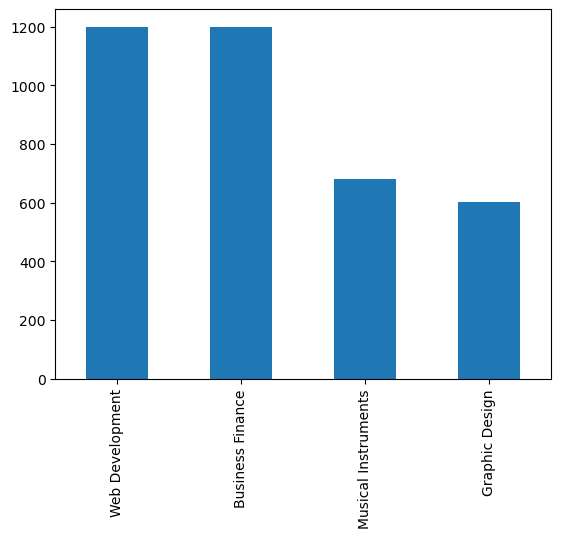

In [51]:
# Plot Distribution of Subject/Value Counts
df['subject'].value_counts().plot(kind='bar')

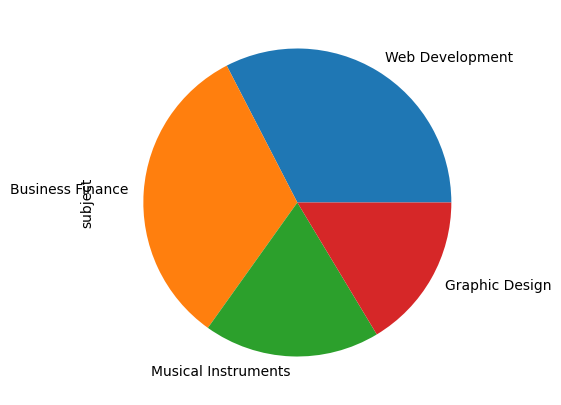

In [52]:
# Plot Distribution of Subject/Value Counts with Pie Chart
plt.figure(figsize=(10,5))
df['subject'].value_counts().plot(kind='pie')
plt.show()

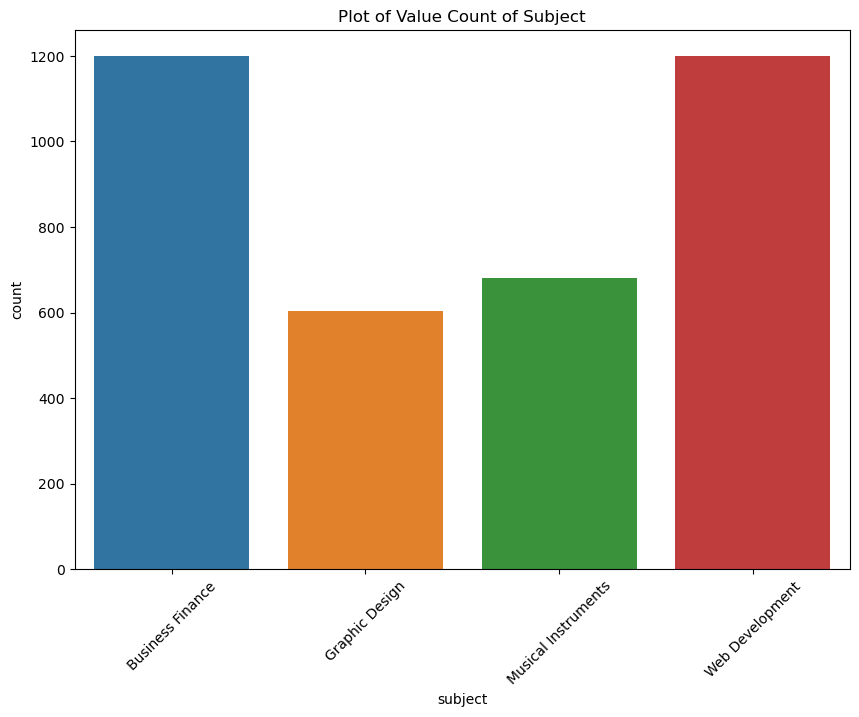

In [53]:
# Method 2: using seaborn
plt.figure(figsize=(10,7))
sns.countplot(df['subject'])
plt.title("Plot of Value Count of Subject")
plt.xticks(rotation=45)
plt.show()

In [ ]:
### EDA on Subscribers
+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

In [55]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [56]:
# Number of Courses per Subject
df['subject'].value_counts()

Web Development        1200
Business Finance       1199
Musical Instruments     681
Graphic Design          603
Name: subject, dtype: int64

In [57]:
# Number of subscribers per Subject
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1870747
Graphic Design         1063148
Musical Instruments     846719
Web Development        7980572
Name: num_subscribers, dtype: int64

<AxesSubplot:xlabel='subject'>

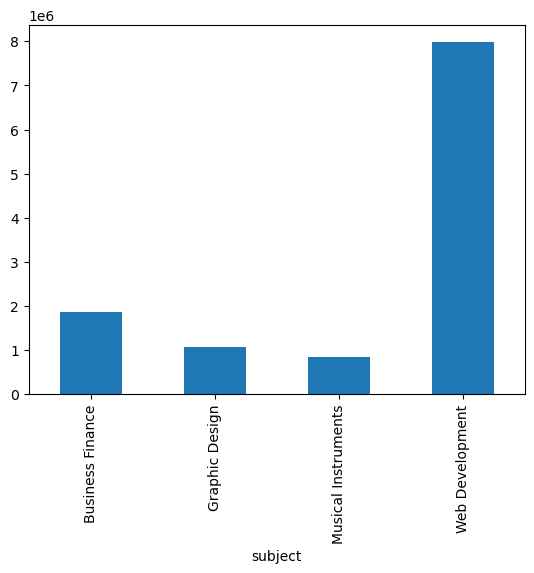

In [58]:
# Plot of the Number of subscribers per Subject
df.groupby('subject')['num_subscribers'].sum().plot(kind='bar')

<AxesSubplot:ylabel='num_subscribers'>

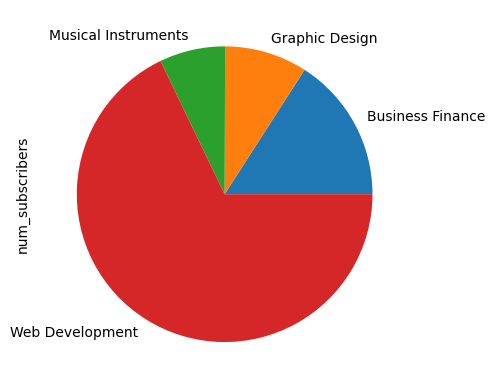

In [59]:
# Plot of the Number of subscribers per Subject
df.groupby('subject')['num_subscribers'].sum().plot(kind='pie')

In [60]:
# Total Number of Subscribers
df['num_subscribers'].sum()

11761186

In [61]:
##Average number of subscribers
df['num_subscribers'].mean()


3193.3711648112953

In [62]:
# Min number of subscriber
df['num_subscribers'].min()

0

In [63]:
# Max number of subscriber
df['num_subscribers'].max()

268923

In [64]:
# Which course has the highest number of sub
df['num_subscribers'].idxmax()

2832

In [65]:
# Get the location
df.iloc[2832]

course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                               Free
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                              10.5 hours
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
Name: 2832, dtype: object

In [66]:
# How many levels do we have
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level', '52'], dtype=object)

In [67]:
# What is the distribution of courses per levels
df['level'].value_counts()

All Levels            1932
Beginner Level        1271
Intermediate Level     421
Expert Level            58
52                       1
Name: level, dtype: int64

<AxesSubplot:>

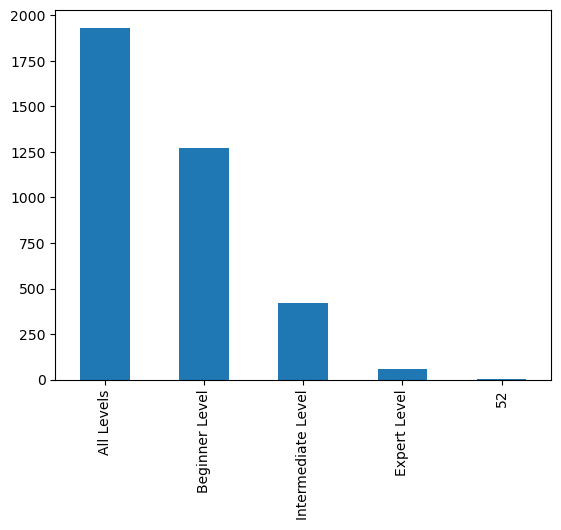

In [68]:
# What is the distribution of courses per levels
df['level'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='level'>

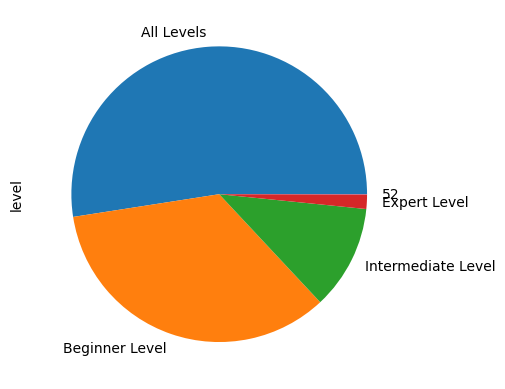

In [69]:
# What is the distribution of courses per levels
df['level'].value_counts().plot(kind='pie')

In [70]:
#  How many subscribers per levels
df.groupby('level')['num_subscribers'].sum()

level
52                         30
All Levels            6916112
Beginner Level        4052843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

In [71]:
df[['num_subscribers','level']]

,num_subscribers,level
0,2147,All Levels
1,2792,All Levels
2,2174,Intermediate Level
3,2451,All Levels
4,1276,Intermediate Level
...,...,...
3678,1040,All Levels
3679,306,Beginner Level
3680,513,All Levels
3681,300,All Levels


<AxesSubplot:xlabel='level'>

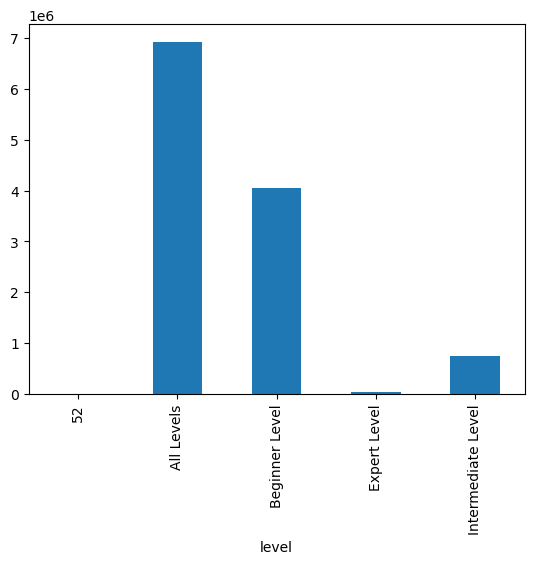

In [72]:
# Plot of How many subscribers per levels
df.groupby('level')['num_subscribers'].sum().plot(kind='bar')

<AxesSubplot:ylabel='num_subscribers'>

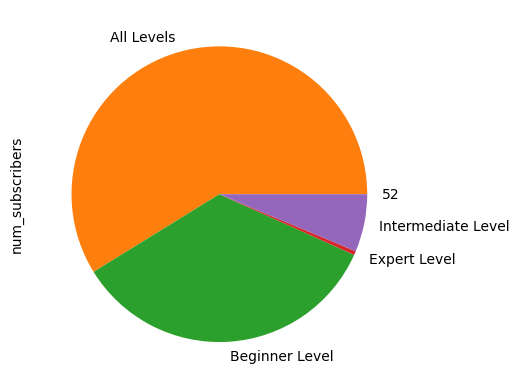

In [73]:
#  How many subscribers per levels
df.groupby('level')['num_subscribers'].sum().plot(kind='pie')

In [74]:
# How many levels per subject category
df.groupby('subject')['level'].value_counts()

subject              level             
Business Finance     All Levels            699
                     Beginner Level        341
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        243
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
                     52                      1
Web Development      All Levels            659
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: level, dtype: int64

<AxesSubplot:xlabel='subject,level'>

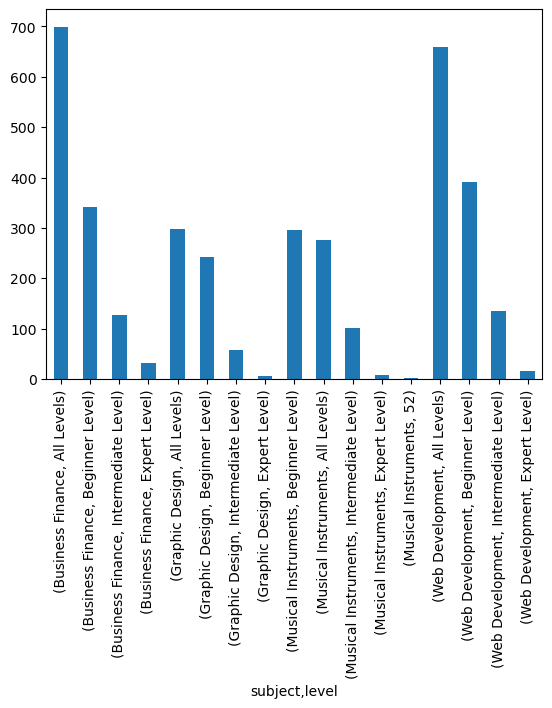

In [75]:
# Plot of How many levels per subject category
df.groupby('subject')['level'].value_counts().plot(kind='bar')

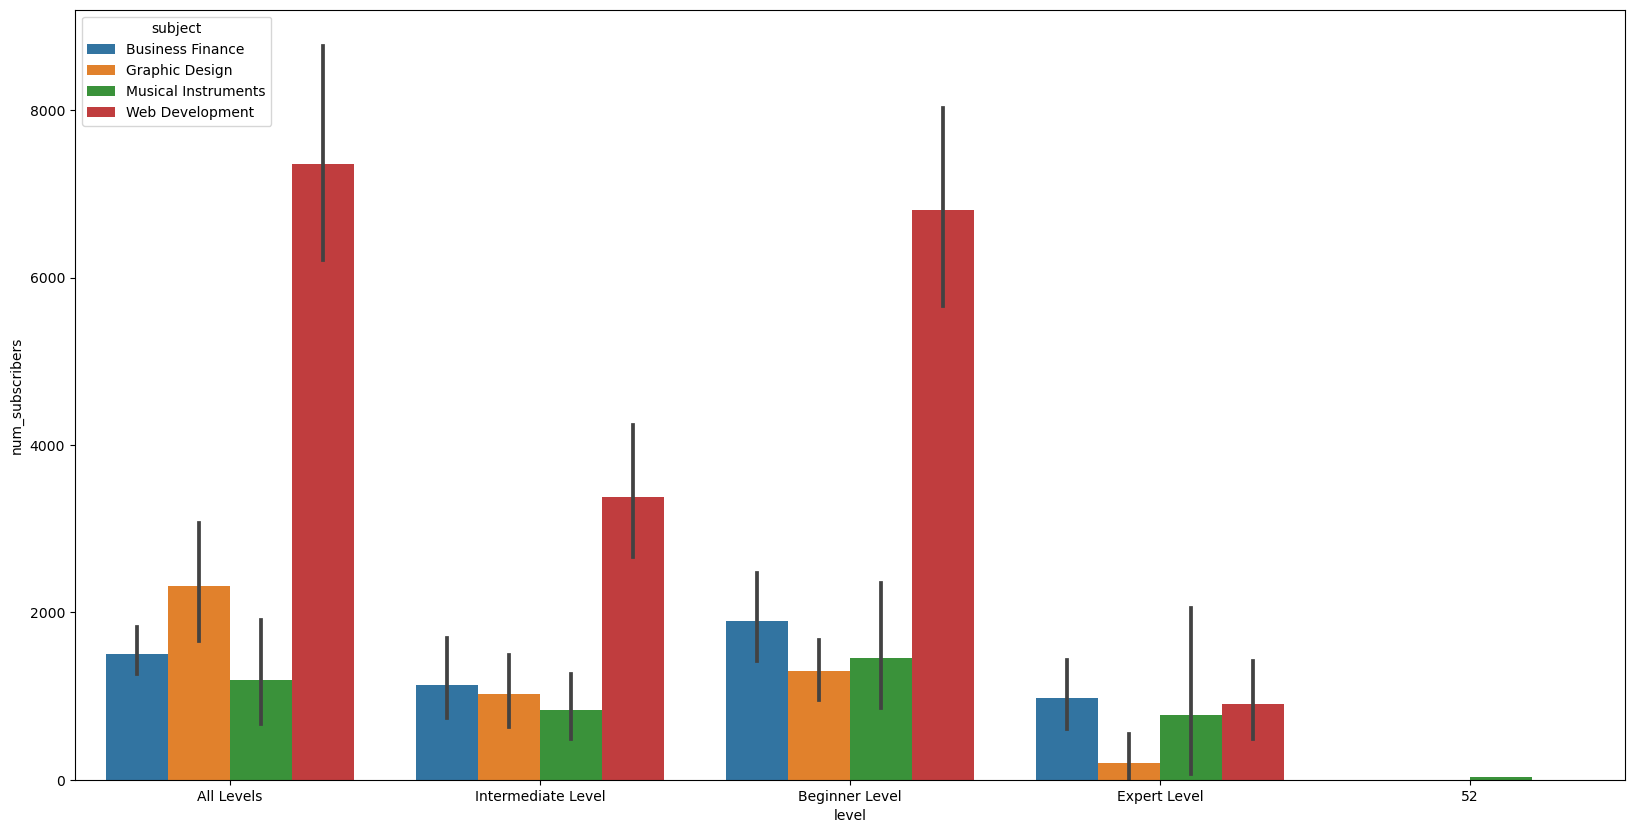

In [76]:
# Using Seaborn 
plt.figure(figsize=(20,10))
sns.barplot(x='level',y='num_subscribers', hue='subject',data=df)
plt.show()

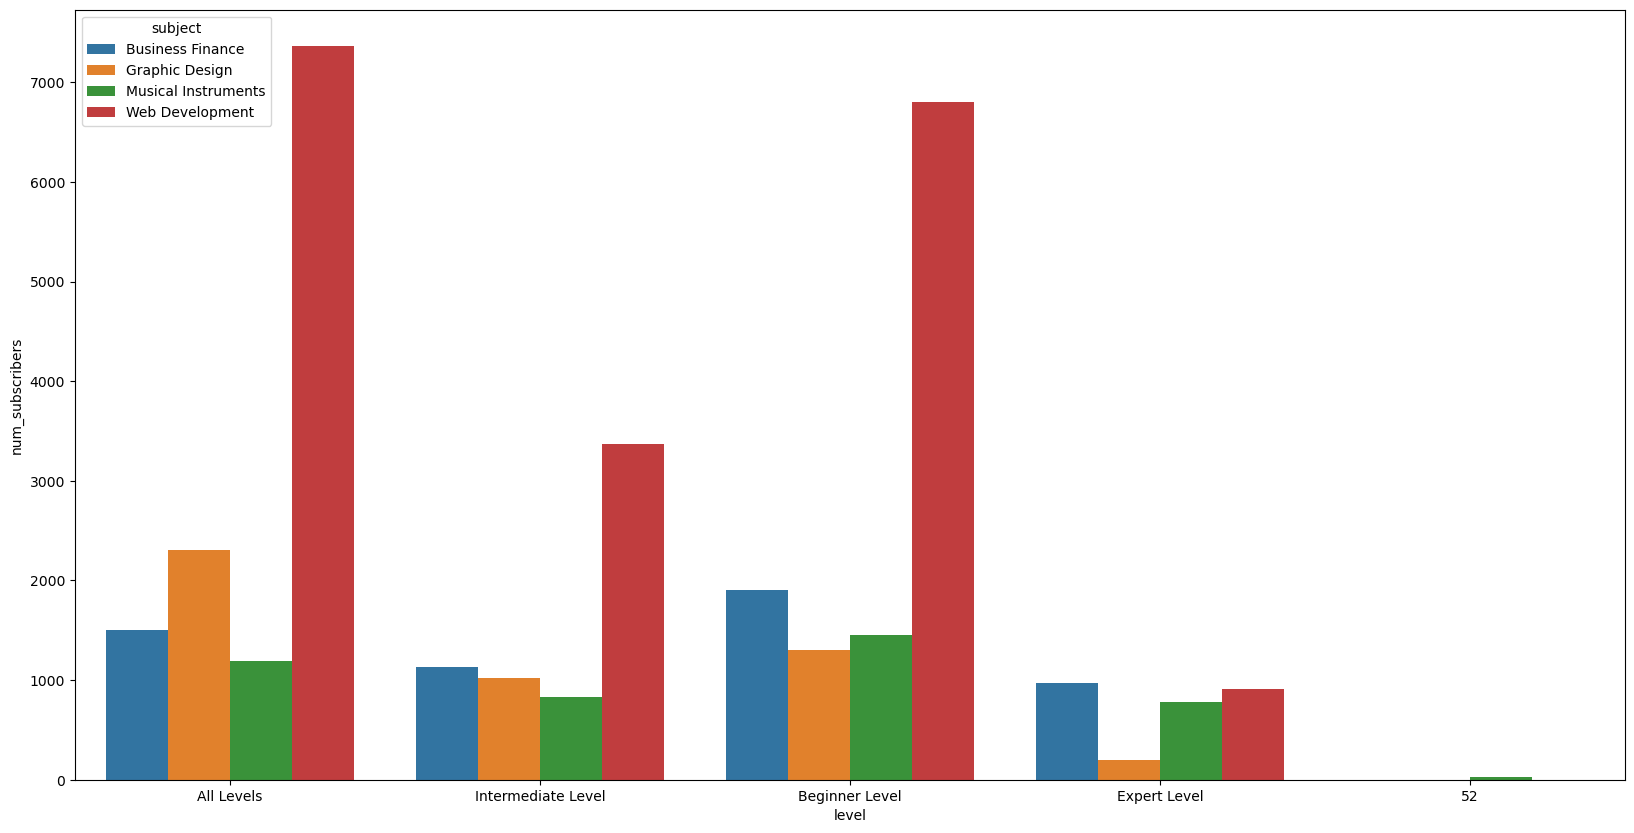

In [77]:
# Using Seaborn 
plt.figure(figsize=(20,10))
sns.barplot(x='level',y='num_subscribers', hue='subject',data=df,ci=None)
plt.show()

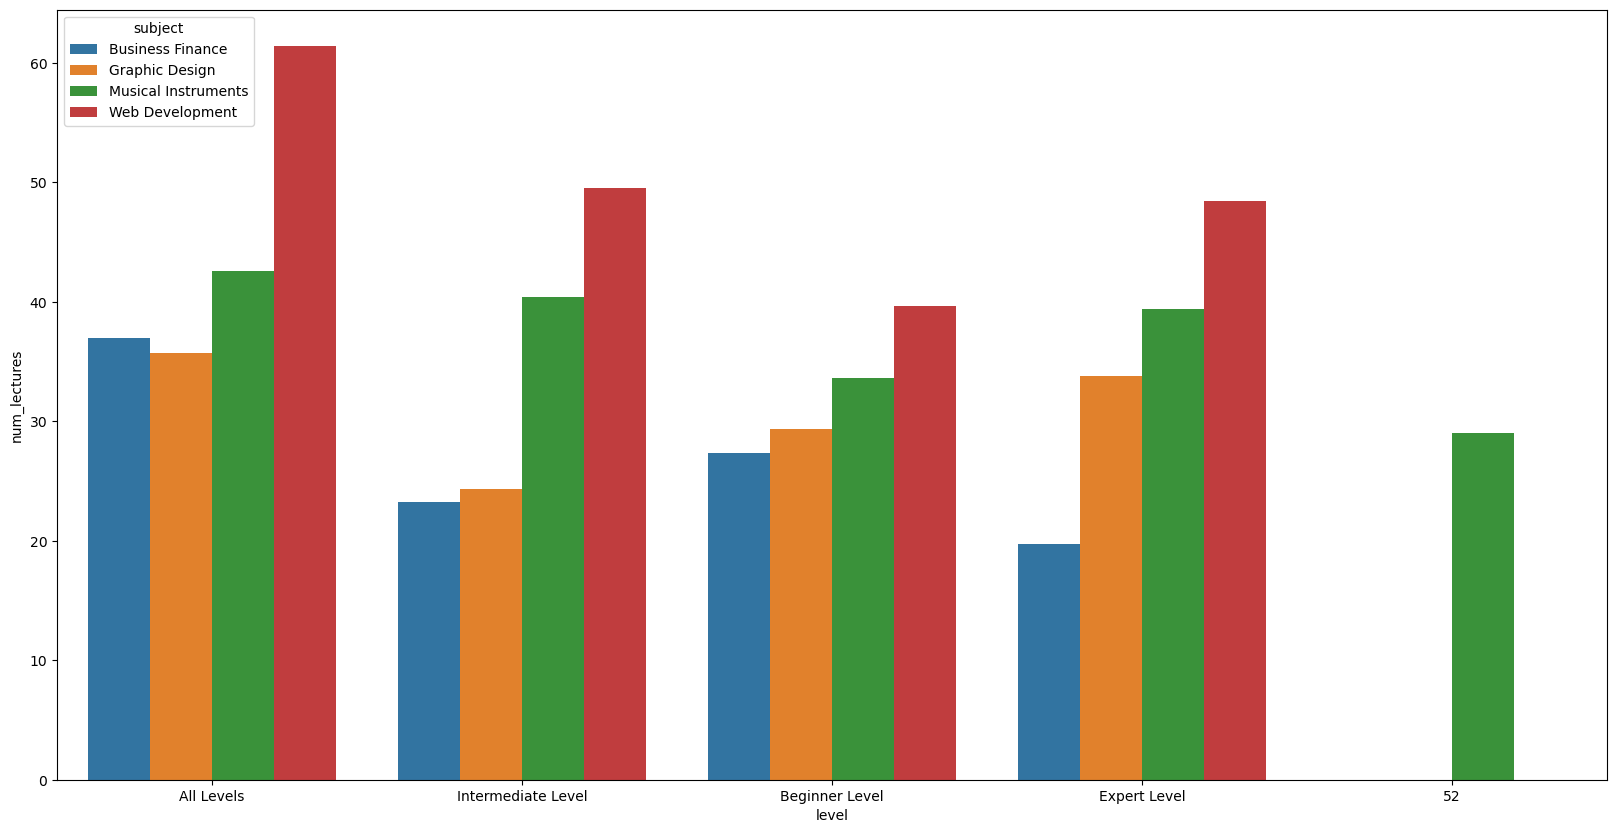

In [78]:
# Using Seaborn 
plt.figure(figsize=(20,10))
sns.barplot(x='level',y='num_lectures', hue='subject',data=df,ci=None)
plt.show()

In [79]:
# EDA on Lectures
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [80]:
def plot_num_of_countable_feature(feature):
    # Using Seaborn 
    plt.figure(figsize=(10,7))
    plt.title("Plot of {} per level per subject".format(feature))
    sns.barplot(x='level',y=feature, hue='subject',data=df,ci=None)
    plt.show()
    plt.figure(figsize=(10,7))
    #  How many subscribers per levels
    plt.title("Plot of {} per level".format(feature))
    df.groupby('level')[feature].sum().plot(kind='pie')
    plt.show()

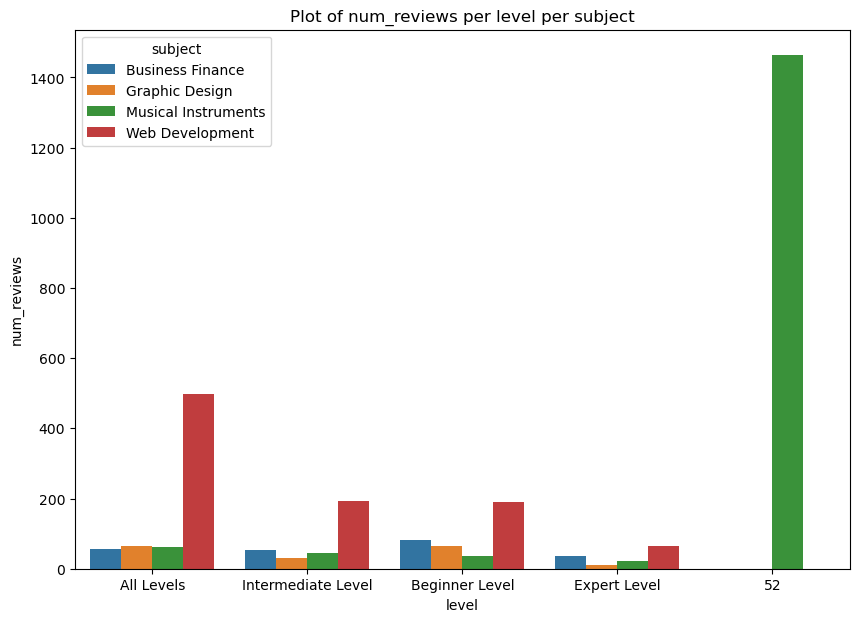

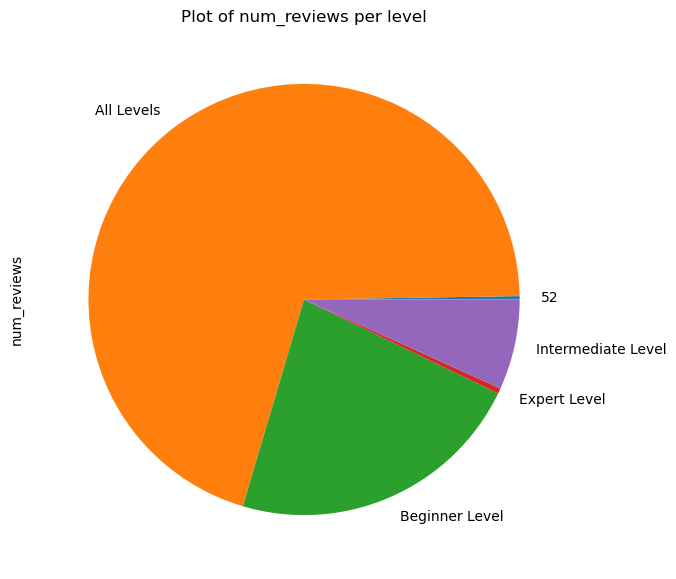

In [81]:
# Plot For the lectures * reviews
plot_num_of_countable_feature('num_reviews')

In [ ]:
### EDA on Price
+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

In [84]:
# Datatype
df['price'].dtype

dtype('O')

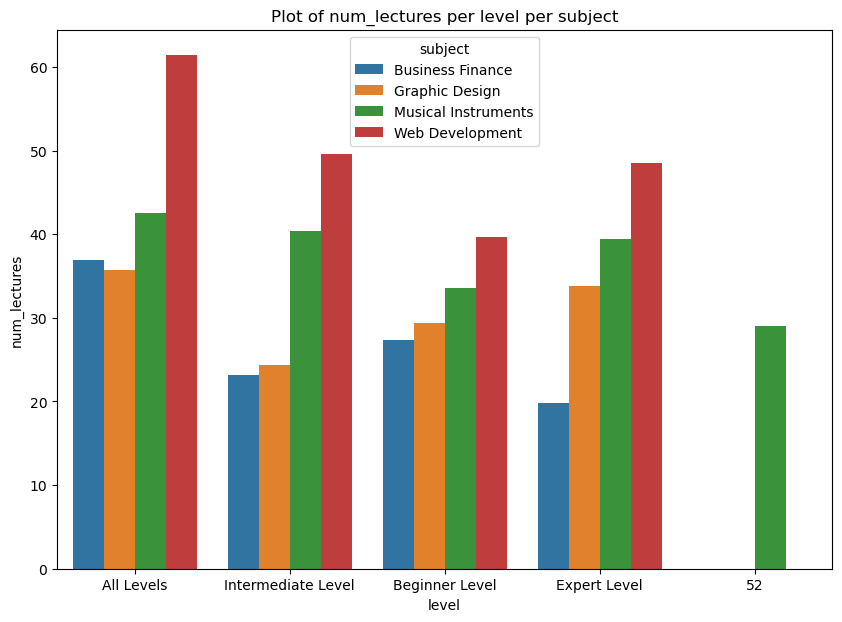

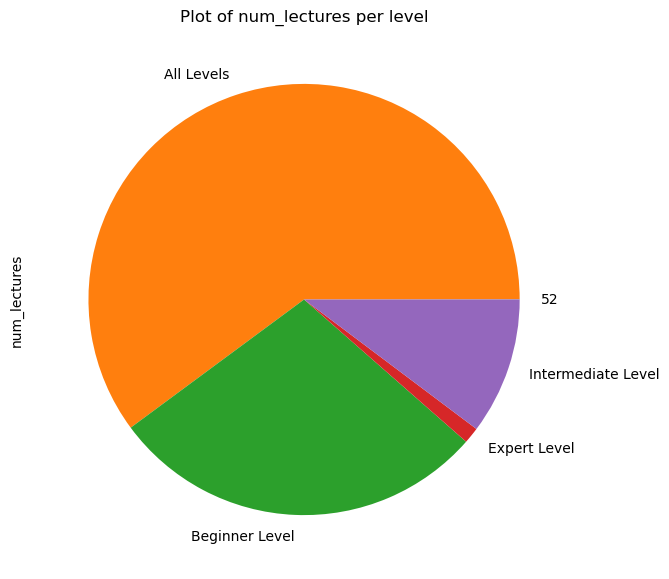

In [85]:
# Plot of lectures
plot_num_of_countable_feature('num_lectures')

In [86]:
# unique price
df.price.unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', 'Free', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135', 'TRUE'],
      dtype=object)

In [87]:
df['price'] = df['price'].str.replace('Free|TRUE','0')

In [88]:
df['price'] = df['price'].astype(float)

In [89]:
# What is the average price
df['price'].mean()

65.99239750203638

In [90]:
# What is the max price
df['price'].max()

200.0

In [91]:
# What is the max price location
df['price'].idxmax()

0

In [92]:
df.iloc[0]

course_id                                                        1070968
course_title                          Ultimate Investment Banking Course
url                    https://www.udemy.com/ultimate-investment-bank...
is_paid                                                             True
price                                                              200.0
num_subscribers                                                     2147
num_reviews                                                           23
num_lectures                                                          51
level                                                         All Levels
content_duration                                               1.5 hours
published_timestamp                                 2017-01-18T20:58:58Z
subject                                                 Business Finance
Name: 0, dtype: object

In [93]:
# What is the most profitable course
# price x num_subscriber
df['profit'] = df['price'] * df['num_subscribers']

In [94]:
# What is the most profitable
df['profit'].max()

24316800.0

In [95]:
# The location of course
df['profit'].idxmax()

3235

In [96]:
df.iloc[3235]

course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                              200.0
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                43 hours
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
profit                                                        24316800.0
Name: 3235, dtype: object

In [97]:
### How Many Courses on Udemy Are paid or free
df['is_paid'].unique()

array(['True', 'False', 'FALSE', 'TRUE',
       'https://www.udemy.com/learnguitartoworship/'], dtype=object)

In [98]:
paid_dict = {'True':True,'False':False,'FALSE':False,'TRUE':True,'https://www.udemy.com/learnguitartoworship/':True}

In [99]:
df['is_paid'] = df['is_paid'].map(paid_dict)

In [100]:
### How Many Courses on Udemy Are paid or free
df['is_paid'].value_counts()

True     3373
False     310
Name: is_paid, dtype: int64

<AxesSubplot:>

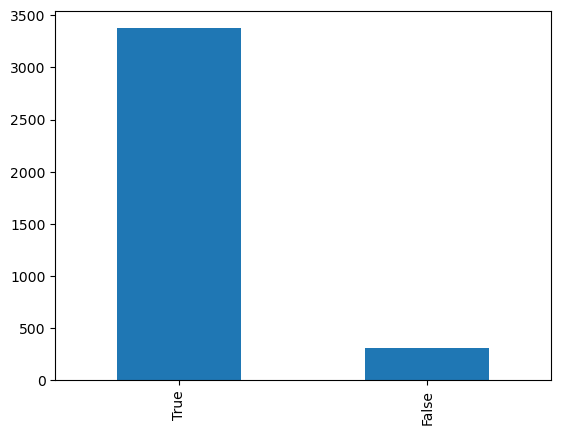

In [101]:
### How Many Courses on Udemy Are paid or free
df['is_paid'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='is_paid', ylabel='count'>

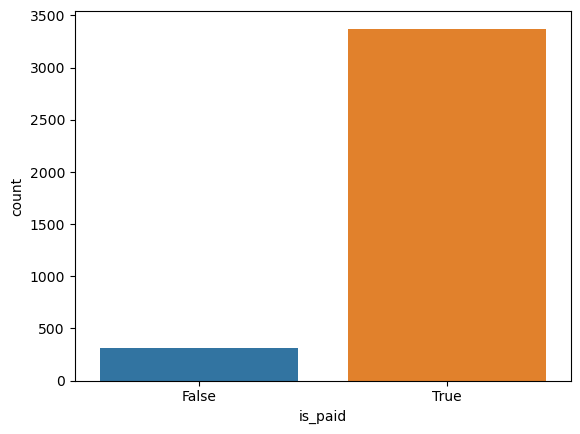

In [102]:
sns.countplot(df['is_paid'])

In [103]:
# How many paid/free course in each subject category
df.groupby('is_paid')['subject'].value_counts()

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1103
         Web Development        1067
         Musical Instruments     635
         Graphic Design          568
Name: subject, dtype: int64

<AxesSubplot:xlabel='is_paid,subject'>

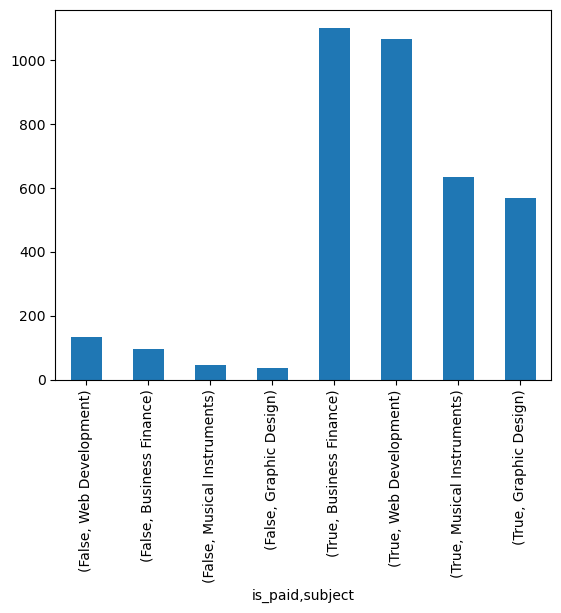

In [104]:
# How many paid/free course in each subject category
df.groupby('is_paid')['subject'].value_counts().plot(kind='bar')

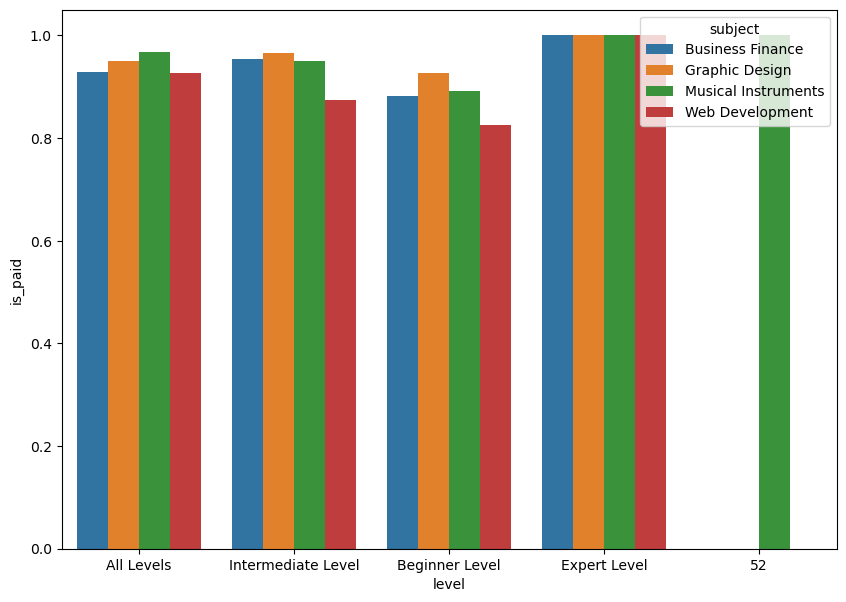

In [105]:

plt.figure(figsize=(10,7))
sns.barplot(x='level',y='is_paid', hue='subject',data=df,ci=None)
plt.show()
    

In [ ]:
### Correlation Question
+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

<AxesSubplot:xlabel='price', ylabel='num_subscribers'>

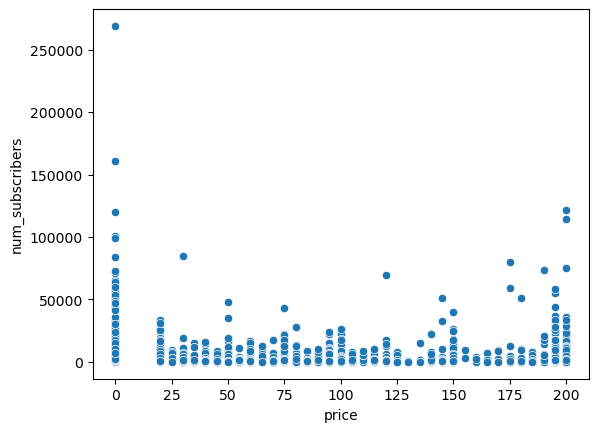

In [106]:
sns.scatterplot(data=df,x='price',y='num_subscribers')

<AxesSubplot:xlabel='price', ylabel='num_reviews'>

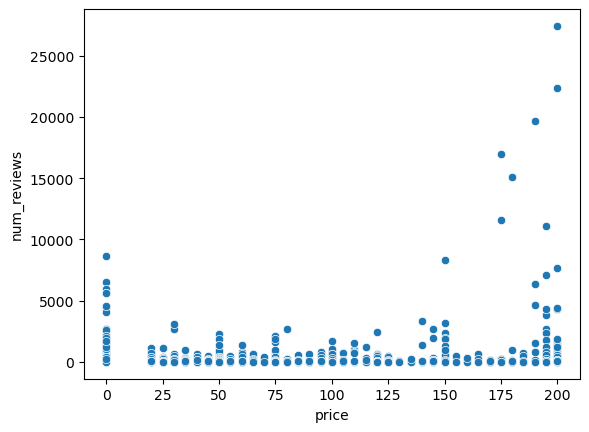

In [107]:
sns.scatterplot(data=df,x='price',y='num_reviews')

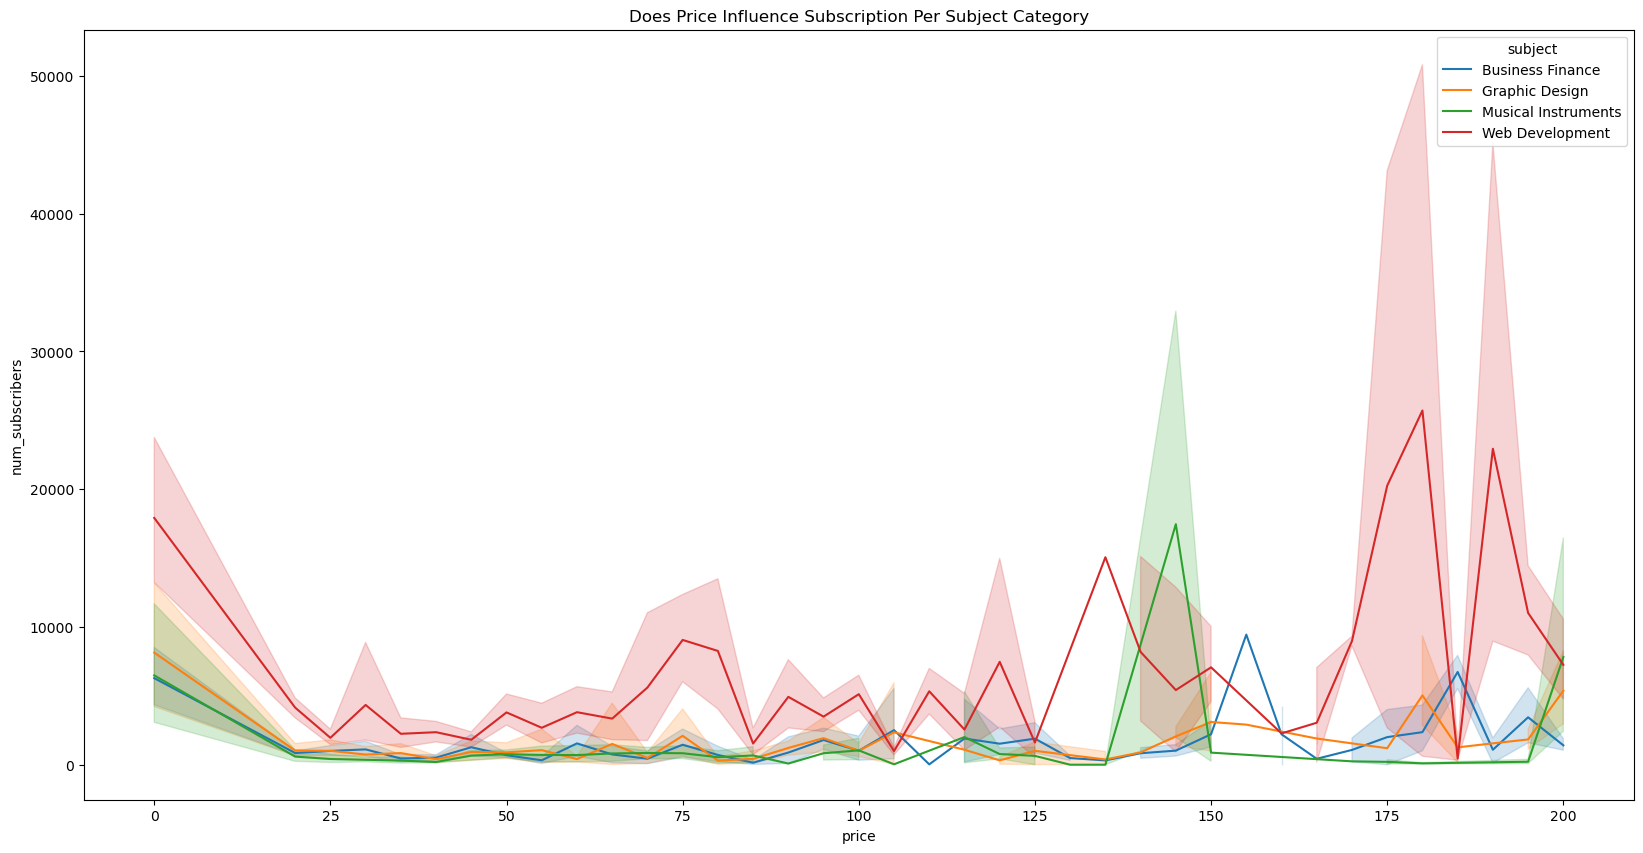

In [108]:
plt.figure(figsize=(20,10))
plt.title("Does Price Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='price',y='num_subscribers',hue='subject')
plt.show()

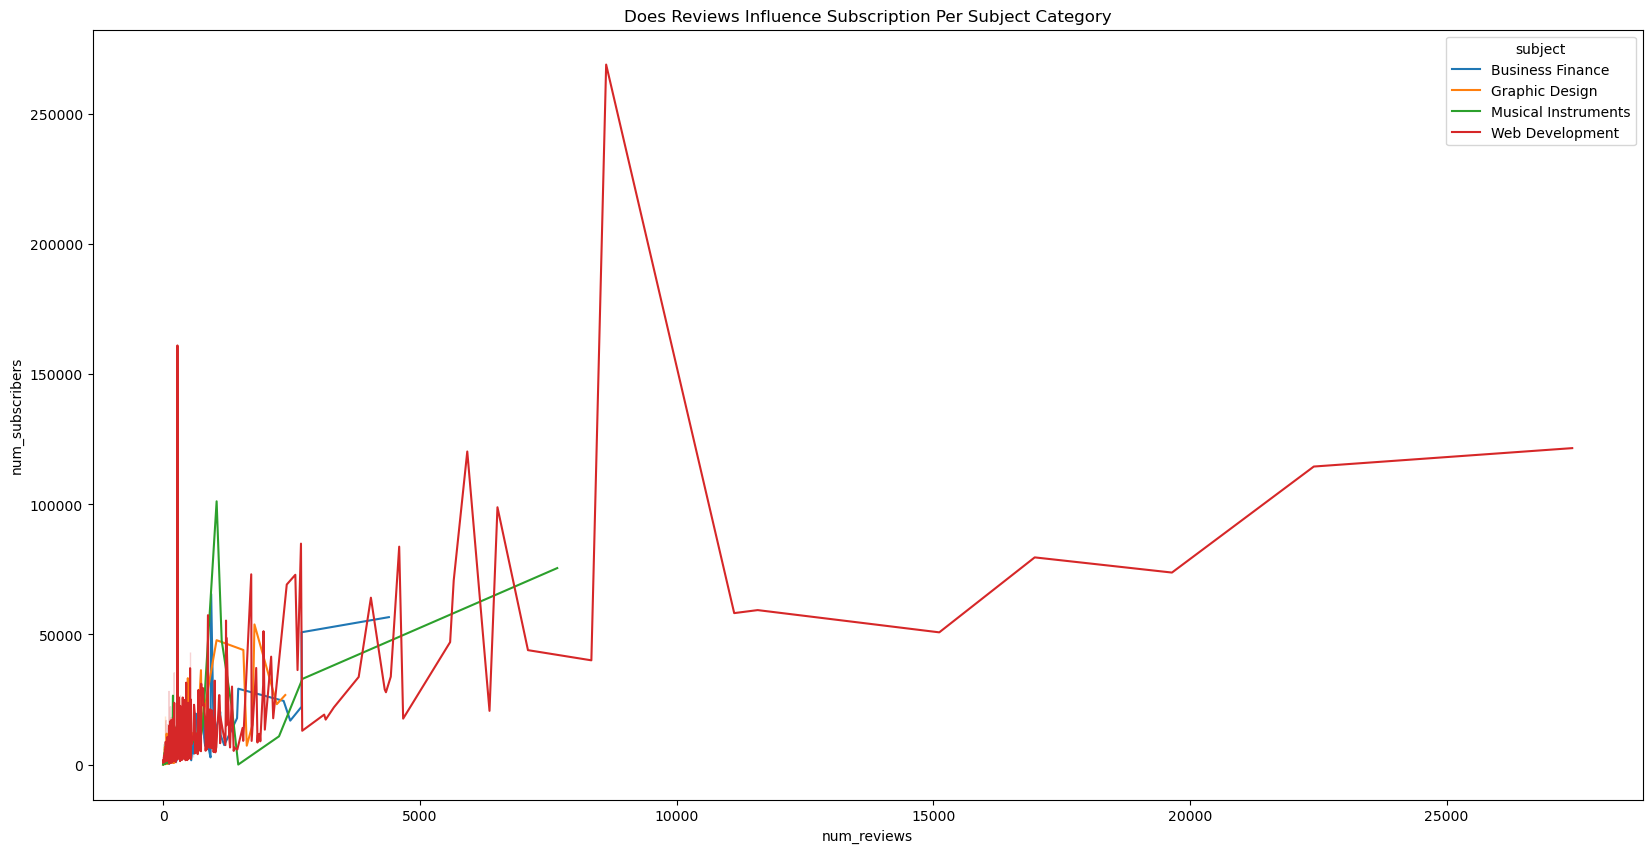

In [109]:
plt.figure(figsize=(20,10))
plt.title("Does Reviews Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='num_reviews',y='num_subscribers',hue='subject')
plt.show()

In [110]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400.0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400.0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830.0
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845.0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200.0


In [111]:
df['published_timestamp'].dtype

dtype('O')

In [112]:
df['published_timestamp'].head()

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [113]:
df['published_timestamp'].str.split('T')

0       [2017-01-18, 20:58:58Z]
1       [2017-03-09, 16:34:20Z]
2       [2016-12-19, 19:26:30Z]
3       [2017-05-30, 20:07:24Z]
4       [2016-12-13, 14:57:18Z]
                 ...           
3678    [2016-06-14, 17:36:46Z]
3679    [2017-03-10, 22:24:30Z]
3680    [2015-12-30, 16:41:42Z]
3681    [2016-08-11, 19:06:15Z]
3682    [2014-09-28, 19:51:11Z]
Name: published_timestamp, Length: 3683, dtype: object

In [114]:
df['published_date'] = df['published_timestamp'].str.split('T').str.get(0)

In [115]:
df['published_date']

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3678    2016-06-14
3679    2017-03-10
3680    2015-12-30
3681    2016-08-11
3682    2014-09-28
Name: published_date, Length: 3683, dtype: object

In [116]:
from datetime import datetime
def convert_to_dt(x):
    mydate = datetime.strptime(x,'%Y-%m-%d')
    result = mydate.strftime("%Y-%m-%d")
    return result

In [117]:
df['published_date'] = df['published_date'].str.replace('3 hours','2017-01-18')

In [118]:
convert_to_dt("2017-01-18")

'2017-01-18'

In [119]:
df['published_date'].apply(lambda x: convert_to_dt(x))

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3678    2016-06-14
3679    2017-03-10
3680    2015-12-30
3681    2016-08-11
3682    2014-09-28
Name: published_date, Length: 3683, dtype: object

In [120]:
df['published_date'] = df['published_date'].apply(lambda x: convert_to_dt(x))

In [121]:
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                  float64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration        object
published_timestamp     object
subject                 object
profit                 float64
published_date          object
dtype: object

In [122]:
df['published_date'] = pd.to_datetime(df['published_date'],format="%Y-%m-%d")

In [123]:
df.dtypes

course_id                       int64
course_title                   object
url                            object
is_paid                          bool
price                         float64
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
level                          object
content_duration               object
published_timestamp            object
subject                        object
profit                        float64
published_date         datetime64[ns]
dtype: object

In [124]:
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day

In [125]:
df.groupby('year')['num_subscribers'].value_counts()

year  num_subscribers
2011  3697               1
      7014               1
      12458              1
      26673              1
      69186              1
                        ..
2017  15276              1
      16158              1
      16829              1
      17784              1
      26742              1
Name: num_subscribers, Length: 2894, dtype: int64

<AxesSubplot:xlabel='year,num_subscribers'>

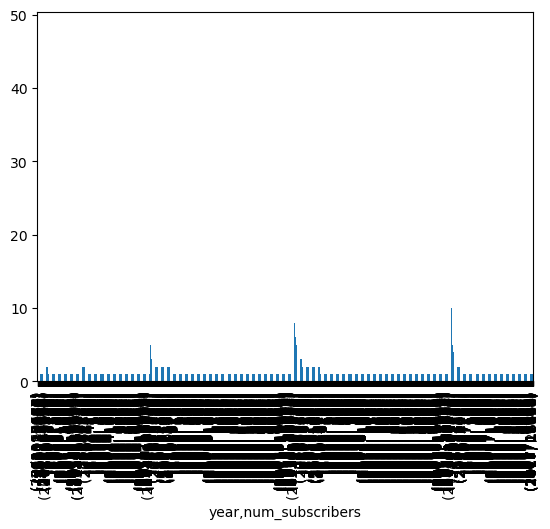

In [126]:
# Plot of Sub Per Year
df.groupby('year')['num_subscribers'].value_counts().plot(kind='bar')

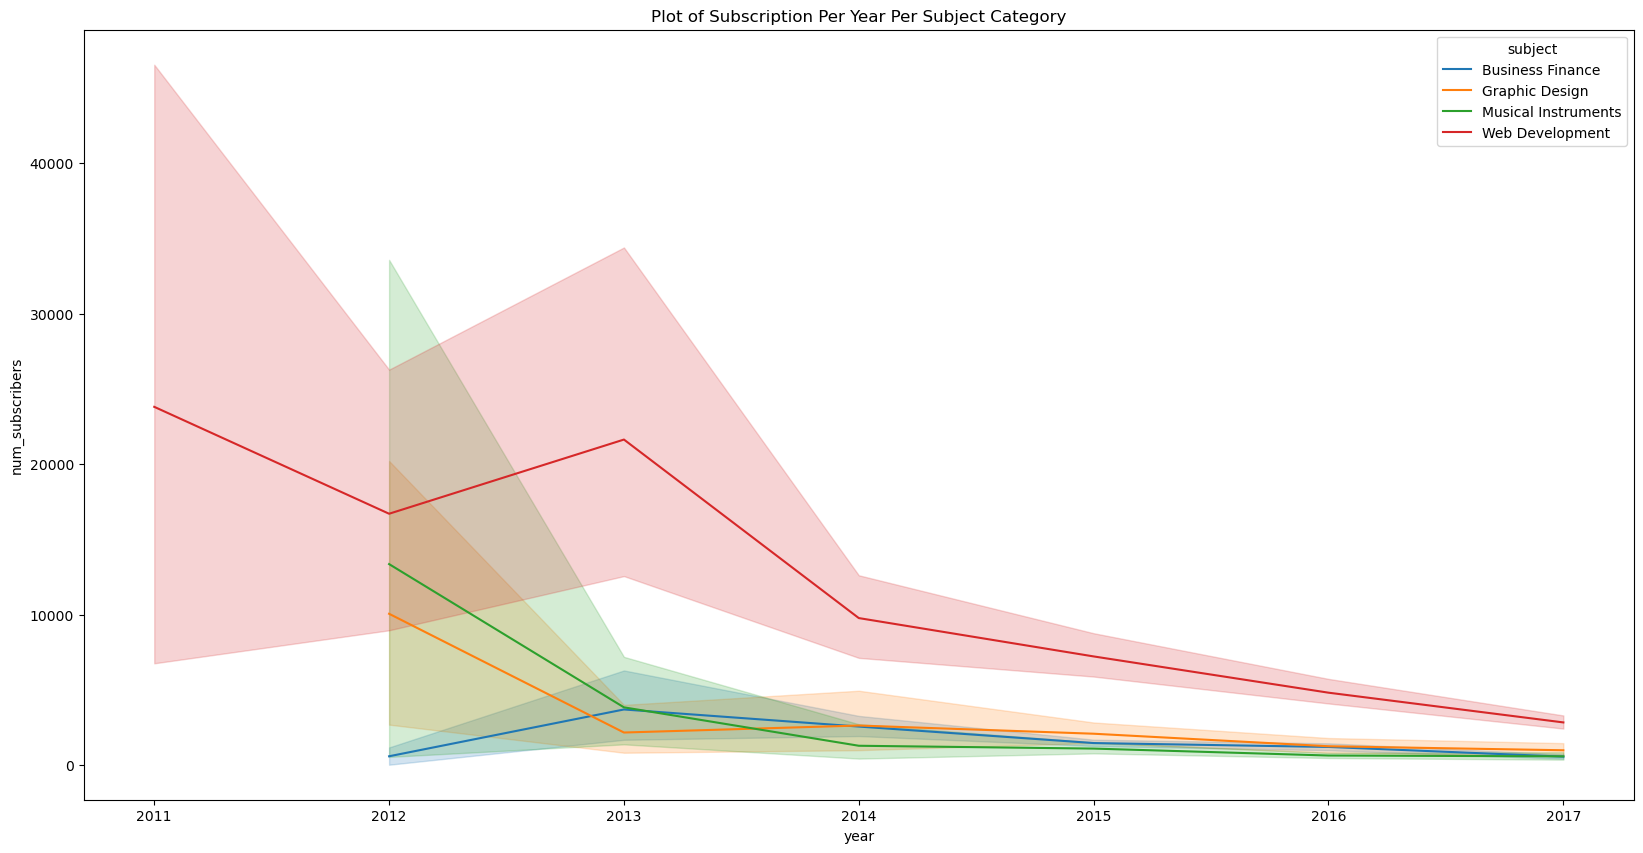

In [127]:
plt.figure(figsize=(20,10))
plt.title("Plot of Subscription Per Year Per Subject Category")
sns.lineplot(data=df,x='year',y='num_subscribers',hue='subject')
plt.show()

In [128]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400.0,2017-01-18,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400.0,2017-03-09,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830.0,2016-12-19,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845.0,2017-05-30,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200.0,2016-12-13,2016,12,13


In [129]:
# Get the Longest Title for a course
df['course_title'].str.len()

0       34
1       59
2       56
3       50
4       44
        ..
3678    56
3679    55
3680    29
3681    54
3682    52
Name: course_title, Length: 3683, dtype: int64

In [130]:
# Get the Longest Title for a course
df['course_title_len'] = df['course_title'].str.len()

In [131]:
# Get Longest title
df['course_title_len'].max()

243

In [132]:
# Get tlocation
df.iloc[243]

course_id                                                    480752
course_title               Investing In Stocks With 10 Simple Rules
url                    https://www.udemy.com/value-investing-rules/
is_paid                                                        True
price                                                          95.0
num_subscribers                                                 871
num_reviews                                                      79
num_lectures                                                     59
level                                                    All Levels
content_duration                                            2 hours
published_timestamp                            2015-06-16T21:35:07Z
subject                                            Business Finance
profit                                                      82745.0
published_date                                  2015-06-16 00:00:00
year                                            

In [133]:
df['course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3678    Learn jQuery from Scratch - Master of JavaScri...
3679    How To Design A WordPress Website With No Codi...
3680                        Learn and Build using Polymer
3681    CSS Animations: Create Amazing Effects on Your...
3682    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3683, dtype: object

In [134]:
# Text Cleaning to remove stopwords
import neattext.functions as nfx

In [137]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [138]:
df['clean_title'] = df['course_title'].apply(nfx.remove_stopwords)

In [139]:
df[['clean_title','course_title']]

,clean_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow Pra...,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Pro - Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3678,Learn jQuery Scratch - Master JavaScript library,Learn jQuery from Scratch - Master of JavaScri...
3679,Design WordPress Website Coding,How To Design A WordPress Website With No Codi...
3680,Learn Build Polymer,Learn and Build using Polymer
3681,CSS Animations: Create Amazing Effects Website,CSS Animations: Create Amazing Effects on Your...


In [140]:
df['clean_title'] = df['clean_title'].apply(nfx.remove_special_characters)

In [141]:
df['clean_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course  Certification  Grow Practice
2        Financial Modeling Business Analysts Consultants
3             Beginner Pro  Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3678      Learn jQuery Scratch  Master JavaScript library
3679                      Design WordPress Website Coding
3680                                  Learn Build Polymer
3681        CSS Animations Create Amazing Effects Website
3682              MODX CMS Build Websites Beginners Guide
Name: clean_title, Length: 3683, dtype: object

In [142]:
# Tokenization
all_title_list = df['clean_title'].to_list()

In [143]:
all_title_list[1:100]

['Complete GST Course  Certification  Grow Practice',
 'Financial Modeling Business Analysts Consultants',
 'Beginner Pro  Financial Analysis Excel 2017',
 'Maximize Profits Trading Options',
 'Trading Penny Stocks Guide Levels 2017',
 'Investing Trading Beginners Mastering Price Charts',
 'Trading Stock Chart Patterns Immediate Explosive Gains',
 'Options Trading 3  Advanced Stock Profit Success Method',
 'Investment Strategy Need Retirement',
 'Forex Trading Secrets Pros Amazons AWS',
 'Trading Options Money Flow',
 'Financial Management Risk Return Securities',
 'Forex Trading Course Work Smarter Harder Proven Results',
 'Python Algo Trading Sentiment Trading News',
 'Short Selling Learn Sell Stocks Fall',
 'Basic Technical Analysis Learn structure market',
 'Complete Chart Pattern Trading Course Proven Approach',
 '7 Deadly Mistakes Investing Slash Profits',
 'Financial Statements Easy',
 'Winning Forex Trading Live Forex Trading Examples',
 'Forex Traders  Create Trading Robot Cod

In [144]:
for line in all_title_list[1:5]:
    print(line.split())
    for i in line.split():
        print(i)

['Complete', 'GST', 'Course', 'Certification', 'Grow', 'Practice']
Complete
GST
Course
Certification
Grow
Practice
['Financial', 'Modeling', 'Business', 'Analysts', 'Consultants']
Financial
Modeling
Business
Analysts
Consultants
['Beginner', 'Pro', 'Financial', 'Analysis', 'Excel', '2017']
Beginner
Pro
Financial
Analysis
Excel
2017
['Maximize', 'Profits', 'Trading', 'Options']
Maximize
Profits
Trading
Options


In [145]:
# Convert list to tokens
all_tokens = [i for line in all_title_list for i in line.split()]

In [146]:
all_tokens

['Ultimate',
 'Investment',
 'Banking',
 'Course',
 'Complete',
 'GST',
 'Course',
 'Certification',
 'Grow',
 'Practice',
 'Financial',
 'Modeling',
 'Business',
 'Analysts',
 'Consultants',
 'Beginner',
 'Pro',
 'Financial',
 'Analysis',
 'Excel',
 '2017',
 'Maximize',
 'Profits',
 'Trading',
 'Options',
 'Trading',
 'Penny',
 'Stocks',
 'Guide',
 'Levels',
 '2017',
 'Investing',
 'Trading',
 'Beginners',
 'Mastering',
 'Price',
 'Charts',
 'Trading',
 'Stock',
 'Chart',
 'Patterns',
 'Immediate',
 'Explosive',
 'Gains',
 'Options',
 'Trading',
 '3',
 'Advanced',
 'Stock',
 'Profit',
 'Success',
 'Method',
 'Investment',
 'Strategy',
 'Need',
 'Retirement',
 'Forex',
 'Trading',
 'Secrets',
 'Pros',
 'Amazons',
 'AWS',
 'Trading',
 'Options',
 'Money',
 'Flow',
 'Financial',
 'Management',
 'Risk',
 'Return',
 'Securities',
 'Forex',
 'Trading',
 'Course',
 'Work',
 'Smarter',
 'Harder',
 'Proven',
 'Results',
 'Python',
 'Algo',
 'Trading',
 'Sentiment',
 'Trading',
 'News',
 'Short

In [147]:
from collections import Counter

In [148]:
word_freq = Counter(all_tokens)

In [149]:
# TOp Words
dict(word_freq.most_common(30))

{'Learn': 493,
 'Trading': 280,
 'Beginners': 246,
 'Course': 231,
 'Guitar': 210,
 'Web': 205,
 'Design': 187,
 'Complete': 181,
 'Piano': 177,
 'Photoshop': 166,
 'Forex': 163,
 'Build': 161,
 'Financial': 139,
 'Create': 135,
 'JavaScript': 123,
 'Beginner': 120,
 'Guide': 116,
 'HTML': 116,
 'Accounting': 113,
 'Website': 110,
 'Development': 110,
 '2': 106,
 'PHP': 105,
 'Options': 101,
 'Adobe': 100,
 '1': 98,
 'Play': 98,
 'de': 97,
 'Introduction': 93,
 'CSS': 92}

In [150]:
top_words = dict(word_freq.most_common(50))

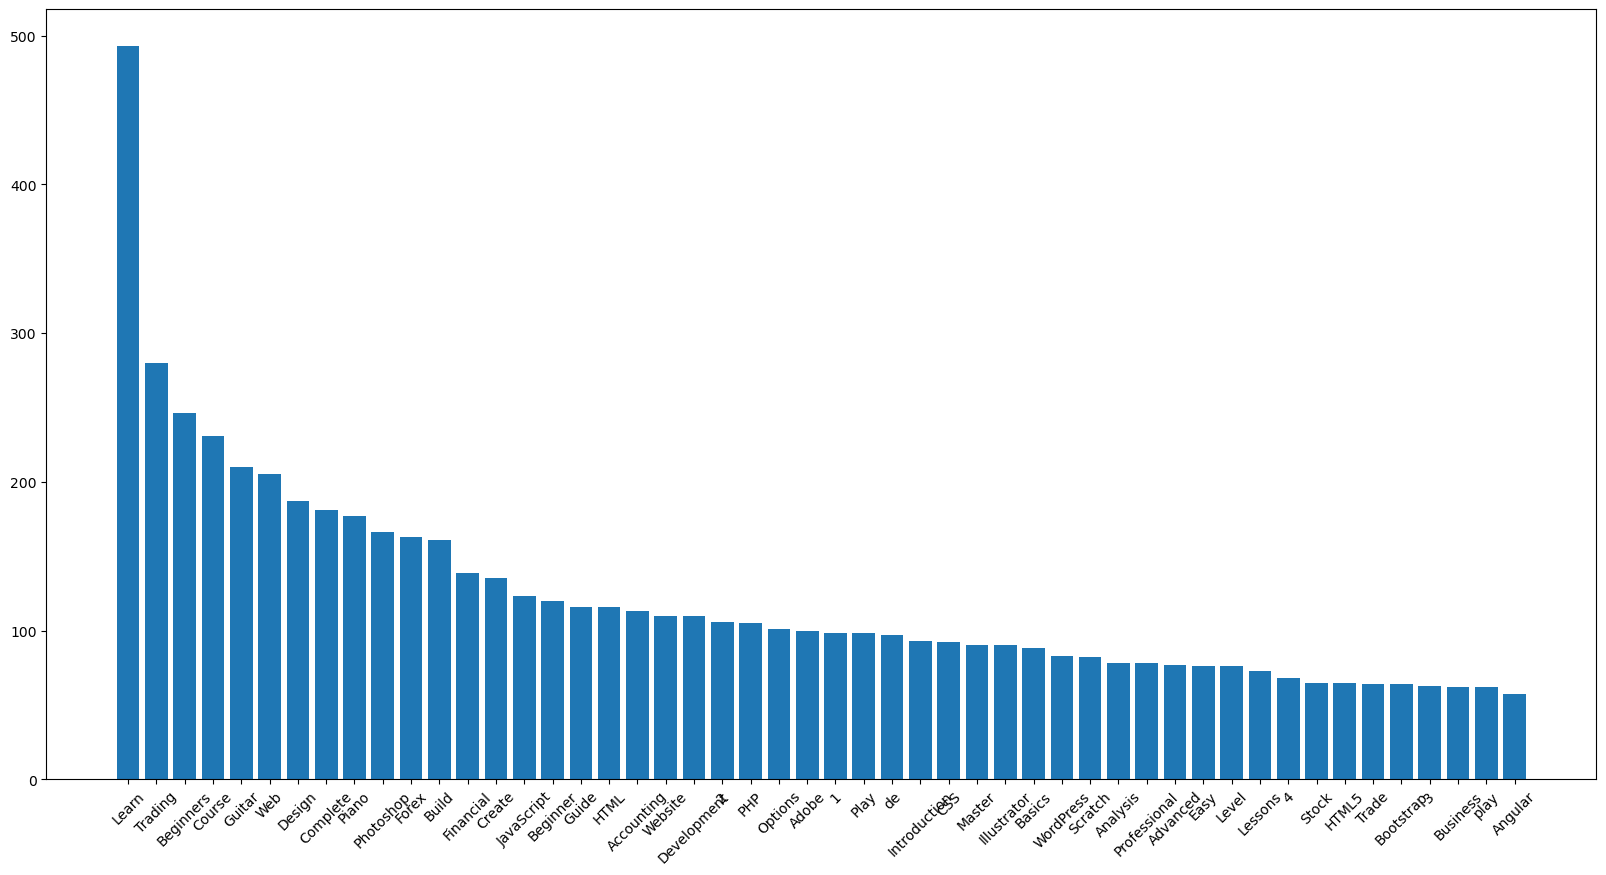

In [151]:
plt.figure(figsize=(20,10))
plt.bar(*zip(*top_words.items()))
plt.xticks(rotation=45)
plt.show()

In [160]:
pip install rake_nltk

Note: you may need to restart the kernel to use updated packages.


In [152]:
from rake_nltk import Rake

In [153]:
>>> import nltk
>>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CompuMisr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [154]:
r = Rake()

In [155]:
join_words = ' '.join(all_tokens)

In [156]:
>>> import nltk
>>> nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CompuMisr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [157]:
r.extract_keywords_from_text(join_words)

In [158]:
print(r.get_ranked_phrases_with_scores())

[(1932321.6067719297, 'angular 2 angular 4 complete aspnet mvc 5 course graphql react complete developers guide create simple photo gallery dropzonejs slick php wordpress hour createmanage website twitter bootstrap 2 beginners bootstrap tutorial essentials basic advanced create engaging website twitter bootstrap 2x javascript basics beginners css tutorial beginners style wordpress templates html5 css3 build modern responsive websites psd html5css3 twitter bootstrap 3 web development website sell thousands wordpress basics business share sell expertise php zend framework 2creating crud application javascript fundamentals building website jekyll big data apache hadoop developers fundamentals wordpress development create custom wordpress website wordpress website 2017 restful services aspnet web api web hosting fundamentals learning path react stunning react websites administering microsoft sql server 2012 databases 70462 php codeignitercrud concepts mvc adobe experience manager cms basic

In [159]:
import pandas as pd
import neattext.functions as nfx
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
df = pd.read_csv("udemy_courses.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [160]:
df.shape

(3683, 12)

In [161]:
df[['course_title','subject']]

,course_title,subject
0,Ultimate Investment Banking Course,Business Finance
1,Complete GST Course & Certification - Grow You...,Business Finance
2,Financial Modeling for Business Analysts and C...,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,Business Finance
4,How To Maximize Your Profits Trading Options,Business Finance
...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,Web Development
3679,How To Design A WordPress Website With No Codi...,Web Development
3680,Learn and Build using Polymer,Web Development
3681,CSS Animations: Create Amazing Effects on Your...,Web Development


In [162]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [163]:
df['course_title'].apply(nfx.remove_stopwords)

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow Pra...
2        Financial Modeling Business Analysts Consultants
3            Beginner Pro - Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3678     Learn jQuery Scratch - Master JavaScript library
3679                      Design WordPress Website Coding
3680                                  Learn Build Polymer
3681       CSS Animations: Create Amazing Effects Website
3682            MODX CMS Build Websites: Beginner's Guide
Name: course_title, Length: 3683, dtype: object

In [164]:
# Remove stopwords
df['clean_course_title'] = df['course_title'].apply(nfx.remove_stopwords)

In [165]:
df[['clean_course_title','course_title']]

,clean_course_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow Pra...,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Pro - Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3678,Learn jQuery Scratch - Master JavaScript library,Learn jQuery from Scratch - Master of JavaScri...
3679,Design WordPress Website Coding,How To Design A WordPress Website With No Codi...
3680,Learn Build Polymer,Learn and Build using Polymer
3681,CSS Animations: Create Amazing Effects Website,CSS Animations: Create Amazing Effects on Your...


In [166]:
# Remove special characters
df['clean_course_title'] = df['clean_course_title'].apply(nfx.remove_special_characters)

In [167]:
# Reduce to lowercase
df['clean_course_title'] = df['clean_course_title'].str.lower()

In [168]:
df[['clean_course_title','course_title']]

,clean_course_title,course_title
0,ultimate investment banking course,Ultimate Investment Banking Course
1,complete gst course certification grow practice,Complete GST Course & Certification - Grow You...
2,financial modeling business analysts consultants,Financial Modeling for Business Analysts and C...
3,beginner pro financial analysis excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,maximize profits trading options,How To Maximize Your Profits Trading Options
...,...,...
3678,learn jquery scratch master javascript library,Learn jQuery from Scratch - Master of JavaScri...
3679,design wordpress website coding,How To Design A WordPress Website With No Codi...
3680,learn build polymer,Learn and Build using Polymer
3681,css animations create amazing effects website,CSS Animations: Create Amazing Effects on Your...


In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [170]:
Xfeatures = df['clean_course_title']
ylabels = df['subject']

In [171]:
Xfeatures

0                      ultimate investment banking course
1       complete gst course  certification  grow practice
2        financial modeling business analysts consultants
3             beginner pro  financial analysis excel 2017
4                        maximize profits trading options
                              ...                        
3678      learn jquery scratch  master javascript library
3679                      design wordpress website coding
3680                                  learn build polymer
3681        css animations create amazing effects website
3682              modx cms build websites beginners guide
Name: clean_course_title, Length: 3683, dtype: object

In [172]:
tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(Xfeatures)

In [173]:
X

<3683x3564 sparse matrix of type '<class 'numpy.float64'>'
	with 18364 stored elements in Compressed Sparse Row format>

In [174]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [175]:
# Convert to DF
df_vec = pd.DataFrame(X.todense(),columns=tfidf_vec.get_feature_names())

In [176]:
df_vec.T

,0,1,2,3,4,5,6,7,8,9,...,3673,3674,3675,3676,3677,3678,3679,3680,3681,3682
000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zombie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuhause,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
# Split our dataset
from sklearn.model_selection import train_test_split

In [178]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [179]:
x_train.shape

(2578, 3564)

In [180]:
# Build Model
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [181]:
# Acccuracy
lr_model.score(x_test,y_test)

0.9547511312217195

In [182]:
### Evaluate our model
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [183]:
y_pred = lr_model.predict(x_test)

In [184]:
# Confusion Matrix : true pos,false pos,etc
confusion_matrix(y_pred,y_test)

array([[382,  20,   8,   5],
       [  1, 142,   0,   2],
       [  1,   1, 183,   0],
       [  2,   9,   1, 348]], dtype=int64)

In [185]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

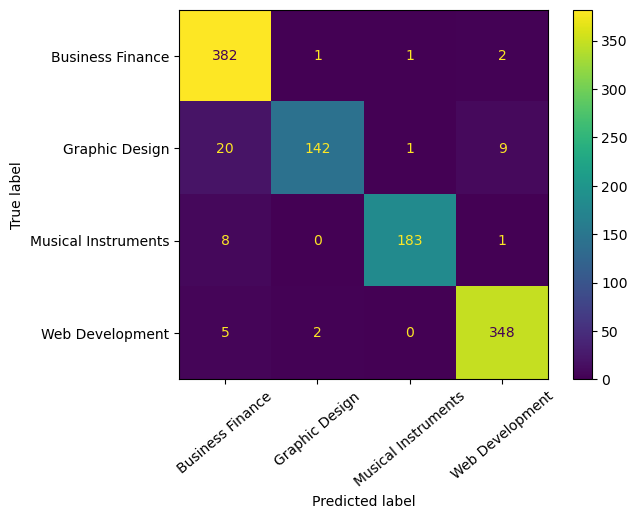

In [186]:
plot_confusion_matrix(lr_model,x_test,y_test,xticks_rotation=40)

In [187]:
# Classification Report
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

   Business Finance       0.99      0.92      0.95       415
     Graphic Design       0.83      0.98      0.90       145
Musical Instruments       0.95      0.99      0.97       185
    Web Development       0.98      0.97      0.97       360

           accuracy                           0.95      1105
          macro avg       0.94      0.96      0.95      1105
       weighted avg       0.96      0.95      0.96      1105



In [188]:
### Making A Single Prediction
ex = "Building A Simple ML Web App"

In [189]:
def vectorize_text(text):
    my_vec = tfidf_vec.transform([text])
    return my_vec.toarray()

In [190]:
vectorize_text(ex)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [191]:
sample1 = vectorize_text(ex)

In [192]:
lr_model.predict(sample1)

array(['Web Development'], dtype=object)

In [193]:
# Prediction Prob
lr_model.predict_proba(sample1)

array([[0.0452693 , 0.03089783, 0.03488388, 0.88894899]])

In [194]:
lr_model.classes_

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [195]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [196]:
# Load Model Inter Pkg
import eli5

In [197]:
# SHow the Weight for each prediction
eli5.show_weights(lr_model)

In [198]:
tfidf_vec.get_feature_names()

['000005',
 '001',
 '01',
 '02',
 '10',
 '100',
 '101',
 '101master',
 '102',
 '10k',
 '10th',
 '11',
 '110',
 '111creating',
 '112',
 '12',
 '123d',
 '13',
 '13customer',
 '14',
 '15',
 '150',
 '16',
 '16propertyplant',
 '17',
 '175',
 '175pa',
 '18',
 '183pa',
 '1872',
 '188',
 '19',
 '1a',
 '1presentation',
 '1year',
 '20',
 '200',
 '201',
 '2012',
 '2013',
 '20132016365',
 '2014',
 '2015',
 '20153',
 '2016',
 '20162017',
 '2017',
 '20172018',
 '2020',
 '21',
 '23',
 '24',
 '24hrs',
 '25',
 '263432aprende',
 '265888learn',
 '28',
 '2creating',
 '2d',
 '2hour',
 '2x',
 '30',
 '30day',
 '31',
 '35',
 '38',
 '398746piano',
 '3course',
 '3d',
 '3dcgblender',
 '3ds',
 '3tier',
 '40',
 '42038learn',
 '45',
 '48',
 '4a',
 '4d',
 '4hours',
 '4trial',
 '50',
 '500',
 '52',
 '53',
 '54',
 '59',
 '5creating',
 '5k',
 '5ths',
 '60',
 '60mins',
 '61',
 '650804guitar',
 '66',
 '70461',
 '70462',
 '72',
 '800',
 '8020',
 '874284weekly',
 '88',
 '8accounting',
 '8currency',
 '90',
 '94',
 '97',
 'a

In [199]:
# See the actual word of the features
# Method 1
eli5.show_weights(lr_model,feature_names=tfidf_vec.get_feature_names())

In [200]:
# Method 2:
eli5.show_weights(lr_model,vec=tfidf_vec)

In [201]:
# Interpreting a Single Prediction
lr_model.predict(sample1)

array(['Web Development'], dtype=object)

In [202]:
sample1

array([[0., 0., 0., ..., 0., 0., 0.]])

In [203]:
ex

'Building A Simple ML Web App'

In [204]:
eli5.show_prediction(lr_model,ex,vec=tfidf_vec)

In [205]:
ex2 = 'Python tutorial for data science'

In [206]:
lr_model.predict(vectorize_text(ex2))

array(['Web Development'], dtype=object)

In [207]:
eli5.show_prediction(lr_model,ex2,vec=tfidf_vec)

In [208]:
# Save Model
import joblib

In [209]:
model_file = open("lr_model_for_udemy_course_prediction_06_feb_2021.pkl","wb")
joblib.dump(lr_model,model_file)
model_file.close()

In [210]:
### Method 2: Pipeline Approach
# Transformers
tf_vec = TfidfVectorizer()
# Estimators
lr_clf = LogisticRegression()
nv_clf = MultinomialNB()

In [211]:
from sklearn.pipeline import make_pipeline,Pipeline

In [212]:
pipe_lr = make_pipeline(tf_vec,lr_clf)

In [213]:
pipe_nv = make_pipeline(tf_vec,nv_clf)  

In [214]:
# Steps
pipe_lr.steps

[('tfidfvectorizer', TfidfVectorizer()),
 ('logisticregression', LogisticRegression())]

In [215]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [216]:
x_train2

3068                                 getting started html
2889       web security common vulnerabilities mitigation
3338                 introduction qgis python programming
168     accounting basics 66 minutes absolutely beginners
3414         complete login registration system php mysql
                              ...                        
1130                                complete forex trader
1294                   santa claus photoshop manipulation
860     cfa level foundation introduction financial re...
3507                             professional css flexbox
3174           supercharging development atom text editor
Name: clean_course_title, Length: 2578, dtype: object

In [217]:
# Fit Our dataset
pipe_lr = pipe_lr.fit(x_train2,y_train2)

In [218]:
pipe_lr.score(x_test2,y_test2)

0.9601809954751132

In [219]:
# Fit Our dataset
pipe_nv = pipe_nv.fit(x_train2,y_train2)
pipe_nv.score(x_test2,y_test2)

0.9420814479638009

In [220]:
pipe_nv.predict([ex])

array(['Web Development'], dtype='<U19')

In [1]:
pip install streamlit

In [222]:
# Core Pkg
import streamlit as st
import streamlit.components.v1 as stc

# Load EDA
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel


# Load Our Dataset
def load_data(data):
	df = pd.read_csv(data)
	return df


# Fxn
# Vectorize + Cosine Similarity Matrix

def vectorize_text_to_cosine_mat(data):
	count_vect = CountVectorizer()
	cv_mat = count_vect.fit_transform(data)
	# Get the cosine
	cosine_sim_mat = cosine_similarity(cv_mat)
	return cosine_sim_mat



# Recommendation Sys
@st.cache
def get_recommendation(title,cosine_sim_mat,df,num_of_rec=10):
	# indices of the course
	course_indices = pd.Series(df.index,index=df['course_title']).drop_duplicates()
	# Index of course
	idx = course_indices[title]

	# Look into the cosine matr for that index
	sim_scores =list(enumerate(cosine_sim_mat[idx]))
	sim_scores = sorted(sim_scores,key=lambda x: x[1],reverse=True)
	selected_course_indices = [i[0] for i in sim_scores[1:]]
	selected_course_scores = [i[0] for i in sim_scores[1:]]

	# Get the dataframe & title
	result_df = df.iloc[selected_course_indices]
	result_df['similarity_score'] = selected_course_scores
	final_recommended_courses = result_df[['course_title','similarity_score','url','price','num_subscribers']]
	return final_recommended_courses.head(num_of_rec)


RESULT_TEMP = """
<div style="width:90%;height:100%;margin:1px;padding:5px;position:relative;border-radius:5px;border-bottom-right-radius: 60px;
box-shadow:0 0 15px 5px #ccc; background-color: #a8f0c6;
  border-left: 5px solid #6c6c6c;">
<h4>{}</h4>
<p style="color:blue;"><span style="color:black;">📈Score::</span>{}</p>
<p style="color:blue;"><span style="color:black;">🔗</span><a href="{}",target="_blank">Link</a></p>
<p style="color:blue;"><span style="color:black;">💲Price:</span>{}</p>
<p style="color:blue;"><span style="color:black;">🧑‍🎓👨🏽‍🎓 Students:</span>{}</p>
</div>
"""

# Search For Course
@st.cache
def search_term_if_not_found(term,df):
	result_df = df[df['course_title'].str.contains(term)]
	return result_df


def main():

	st.title("Course Recommendation App")

	menu = ["Home","Recommend","About"]
	choice = st.sidebar.selectbox("Menu",menu)

	df = load_data("data/udemy_course_data.csv")

	if choice == "Home":
		st.subheader("Home")
		st.dataframe(df.head(10))


	elif choice == "Recommend":
		st.subheader("Recommend Courses")
		cosine_sim_mat = vectorize_text_to_cosine_mat(df['course_title'])
		search_term = st.text_input("Search")
		num_of_rec = st.sidebar.number_input("Number",4,30,7)
		if st.button("Recommend"):
			if search_term is not None:
				try:
					results = get_recommendation(search_term,cosine_sim_mat,df,num_of_rec)
					with st.beta_expander("Results as JSON"):
						results_json = results.to_dict('index')
						st.write(results_json)

					for row in results.iterrows():
						rec_title = row[1][0]
						rec_score = row[1][1]
						rec_url = row[1][2]
						rec_price = row[1][3]
						rec_num_sub = row[1][4]

						# st.write("Title",rec_title,)
						stc.html(RESULT_TEMP.format(rec_title,rec_score,rec_url,rec_url,rec_num_sub),height=350)
				except:
					results= "Not Found"
					st.warning(results)
					st.info("Suggested Options include")
					result_df = search_term_if_not_found(search_term,df)
					st.dataframe(result_df)



				# How To Maximize Your Profits Options Trading




	else:
		st.subheader("About")
		st.text("Built with Streamlit & Pandas")


if __name__ == '__main__':
	main()

2023-05-13 13:42:53.593 
  command:

    streamlit run C:\Users\CompuMisr\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
